In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


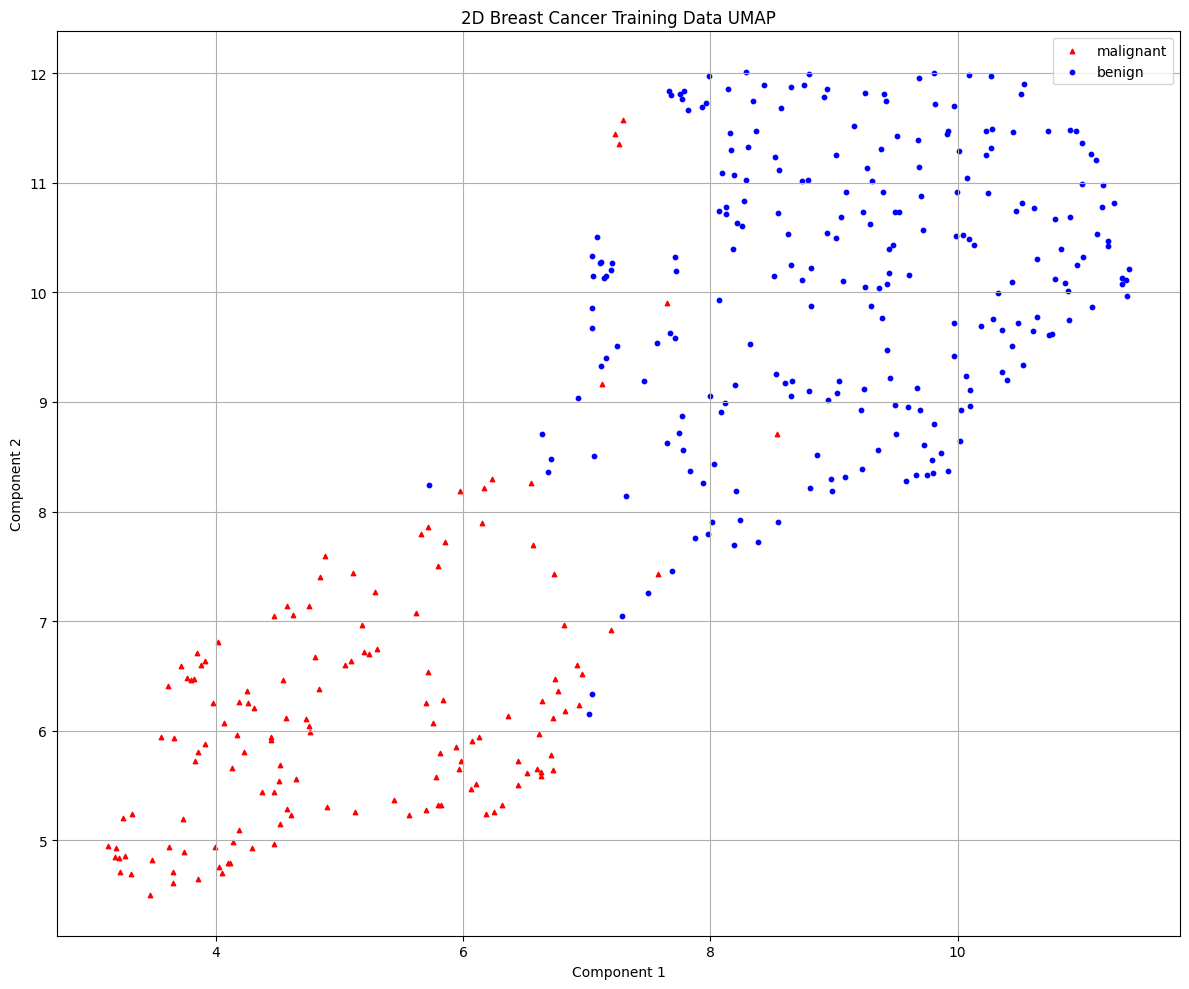

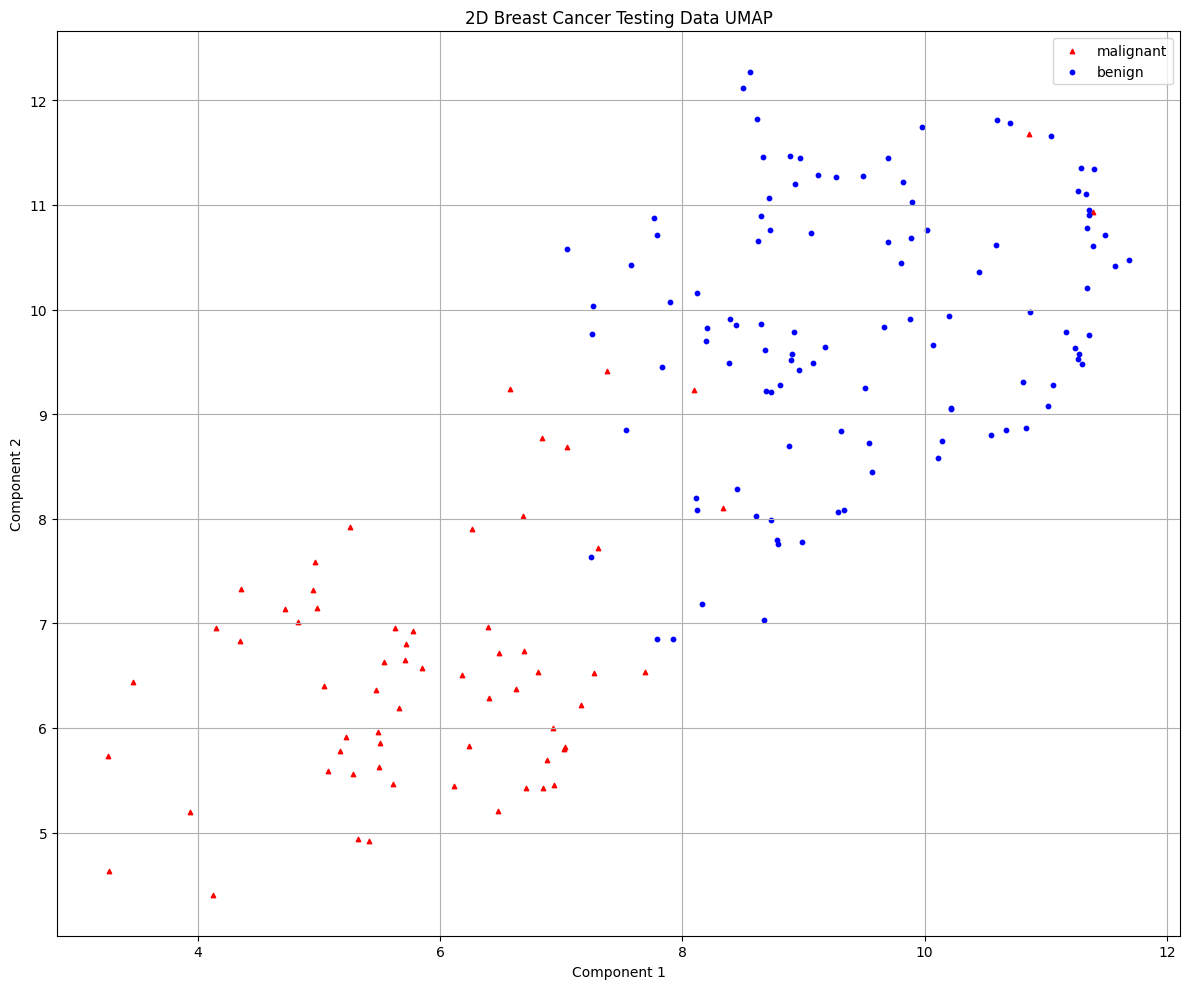

[I 2025-04-27 10:31:31,947] A new study created in memory with name: no-name-33f45406-fbb9-4bac-a4b9-ebde2d2a1e08
[I 2025-04-27 10:31:34,818] Trial 0 finished with value: 0.9605263157894737 and parameters: {'n_estimators': 649, 'max_depth': 13, 'min_samples_split': 11, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.9605263157894737.
[I 2025-04-27 10:31:37,927] Trial 1 finished with value: 0.9605263157894737 and parameters: {'n_estimators': 656, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9605263157894737.
[I 2025-04-27 10:31:43,604] Trial 2 finished with value: 0.9578947368421054 and parameters: {'n_estimators': 768, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.9605263157894737.
[I 2025-04-27 10:31:46,403] Trial 3 finished with value: 0.9710526315789474 and parameters: {'n_estimators': 306, 'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 2}. Best is trial 3 with val

Best trial:
Accuracy: 0.9763157894736842
Best hyperparameters:  {'n_estimators': 971, 'max_depth': 31, 'min_samples_split': 5, 'min_samples_leaf': 6}


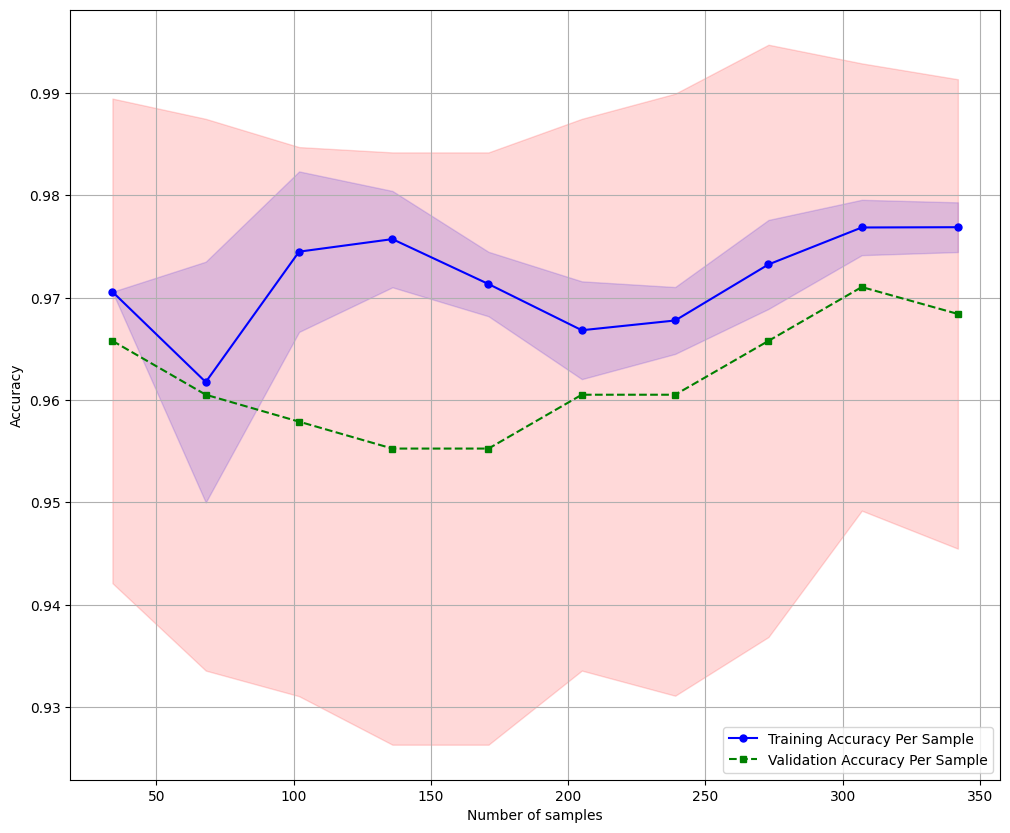

Confusion Matrix
[[ 50  14]
 [  0 107]]
Accuracy: 0.9181, Precision: 0.8843, Recall: 1.0000, F1: 0.9386, AUC: 0.9673


In [2]:
outlier_params = {'n_neighbors': 20}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'loc', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('rf', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)